In [1]:
import torch
import clip
from PIL import Image
import matplotlib.pyplot as plt
import openai
import requests
from io import BytesIO
import torchvision
import numpy as np
from transformers import GPT2LMHeadModel, GPT2Tokenizer
from Classifier import Classifier

In [2]:
classifier=Classifier(['cat','dog'])
classifier.descriptors={'cat':['long, sensitive whiskers','have large, round eyes','have large, upright ears','have soft, thick fur'],'dog':['have two large, round eyes','have a wet nose','are covered in fur','have claws on their paws']}

In [3]:
dog=Image.open("dog.png")
cat=Image.open("cat.jpg")

In [4]:
classifier.compute_threshold()

0.125


In [10]:
classifier.set_image(cat)

This image may show: 
1) cat: 99.7489333152771%
2) dog: 0.25107134133577347%


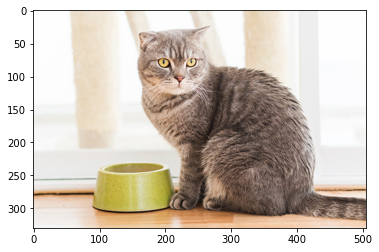

In [11]:
classifier.classify()

In [12]:
classifier.similarity_desc

{'cat': array([26.605988, 28.596369, 28.435856, 27.61741 ], dtype=float32),
 'dog': array([24.484451, 20.853233, 20.057644, 21.921597], dtype=float32)}

cat is characterized by the following features: 
❌ long, sensitive whiskers: 5.780045688152313%
✅ have large, round eyes: 42.30024516582489%
✅ have large, upright ears: 36.02740466594696%
✅ have soft, thick fur: 15.892300009727478%


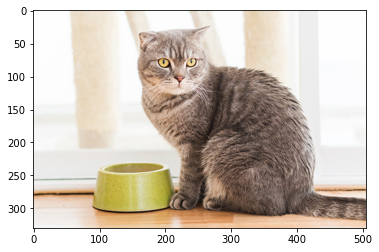

In [14]:
classifier.explain('cat')

In [2]:
# Load the GPT-2 model and tokenizer
model_name = 'gpt2-large'
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model = GPT2LMHeadModel.from_pretrained(model_name)

In [6]:
# Define the function that generates features for a category

def generate_features(label):
    # Generate the input text for the GPT-2 model
    input_text = f"Q: What are useful features for distinguishing a {label} in a photo? the answer should only be in the form of bullet point following the schema 'is/has {{feature}} {{adjective}}'. \nA: There are several useful visual features to tell there is an {label} in a photo:"
    input_ids = tokenizer.encode(input_text, return_tensors='pt')

    # Generate text from the GPT-2 model
    output = model.generate(input_ids, max_length=100,pad_token_id=tokenizer.eos_token_id, do_sample=True, temperature=0.7)
    output_text = tokenizer.decode(output[0], skip_special_tokens=True)



    return output_text


In [7]:
# Example usage
category = 'airplane'
features = generate_features(category)
print(features)

Q: What are useful features for distinguishing a airplane in a photo? the answer should only be in the form of bullet point following the schema 'is/has {feature} {adjective}'. 
A: There are several useful visual features to tell there is an airplane in a photo: The plane's wings are straight, not pointed.
The wings are low.
The wings are not swept back.
The plane is not in disarray.
The plane is not upside
